<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Visualisation/LSTM_B_T_Median_base-model_visualized_succinct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Loading essentials
import numpy as np
from numpy import loadtxt
from numpy import reshape
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Load data
dataset = loadtxt('B-T-median.csv', delimiter = ',')
print (dataset)
print(np.size(dataset))

[[0.361 0.723 0.802 ... 0.379 0.833 1.   ]
 [0.692 0.676 0.686 ... 0.    0.    1.   ]
 [1.    1.    0.711 ... 0.    0.    0.   ]
 ...
 [1.    0.824 0.158 ... 0.    0.    0.   ]
 [1.    0.866 0.377 ... 0.    0.    0.   ]
 [1.    0.839 0.083 ... 0.899 0.882 1.   ]]
1680


In [0]:
# Reshape 2D dataset into a 3D dataset with columns as features with one time-step
x = dataset.reshape(56, 1, 30)

In [0]:
# Confirm data shape of 56 samples (rows), 1 time-step per feature (columns as features with one time-step), 29 features/z-scored inclevel gene values (16 from B-cells & 13 from T-cells, in that order) & the last 1 column as binary output of good (1) and bad (0) learners as differentiated by the population median.
print(x.shape)
print(x.size)

(56, 1, 30)
1680


In [0]:
#print x
print(x)

[[[0.361 0.723 0.802 ... 0.379 0.833 1.   ]]

 [[0.692 0.676 0.686 ... 0.    0.    1.   ]]

 [[1.    1.    0.711 ... 0.    0.    0.   ]]

 ...

 [[1.    0.824 0.158 ... 0.    0.    0.   ]]

 [[1.    0.866 0.377 ... 0.    0.    0.   ]]

 [[1.    0.839 0.083 ... 0.899 0.882 1.   ]]]


In [0]:
#Specify binary output of good (1) and bad (0) learners, y, in x & print y. Learner type differentiated by population median.
y = x [:, :, -1]
print(y)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [0]:
# Define LSTM One to One Model with Sigmoid activation on the output layer for binary classification
model = Sequential()
model.add(LSTM(5, input_shape=(1,30)))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#Compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
#Fit the model with a 80-20 split of dataset & shuffling sample order within an epoch
history = model.fit(x, y, validation_split = 0.2, batch_size = 8, epochs = 1000, shuffle = True, verbose=1)

Train on 44 samples, validate on 12 samples
Epoch 1/1000
44/44 [==============================] - 2s 35ms/step - loss: 0.7142 - acc: 0.5000 - val_loss: 0.7123 - val_acc: 0.4167
Epoch 2/1000
44/44 [==============================] - 0s 621us/step - loss: 0.7102 - acc: 0.4773 - val_loss: 0.7032 - val_acc: 0.4167
Epoch 3/1000
44/44 [==============================] - 0s 615us/step - loss: 0.7048 - acc: 0.4318 - val_loss: 0.6966 - val_acc: 0.3333
Epoch 4/1000
44/44 [==============================] - 0s 467us/step - loss: 0.7016 - acc: 0.3409 - val_loss: 0.6894 - val_acc: 0.5000
Epoch 5/1000
44/44 [==============================] - 0s 452us/step - loss: 0.6992 - acc: 0.4773 - val_loss: 0.6826 - val_acc: 0.7500
Epoch 6/1000
44/44 [==============================] - 0s 491us/step - loss: 0.6953 - acc: 0.5000 - val_loss: 0.6791 - val_acc: 0.7500
Epoch 7/1000
44/44 [==============================] - 0s 454us/step - loss: 0.6931 - acc: 0.4773 - val_loss: 0.6757 - val_acc: 0.7500
Epoch 8/1000
44/44 

In [0]:
#Model Summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 720       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________
None


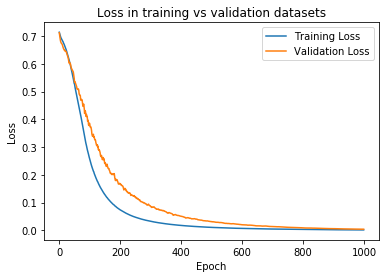

In [0]:
#Diagnostic plot Ia: Model Performance (training loss vs test loss) for 1000 epochs
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()


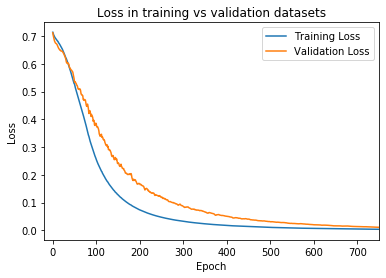

In [0]:
#Diagnostic plot Ib: Model Performance (training loss vs test loss) for 750 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-20, 750)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

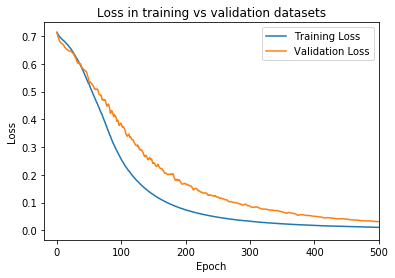

In [0]:
#Diagnostic plot Ic: Model Performance (training loss vs test loss) for 500 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-20, 500)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

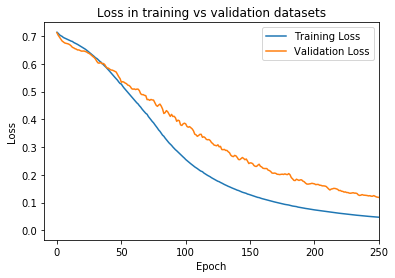

In [0]:
#Diagnostic plot Id: Model Performance (training loss vs test loss) for 250 epochs
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Loss in training vs validation datasets')
pyplot.xlim(-10, 250)
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Loss', 'Validation Loss'], loc='upper right')
pyplot.show()

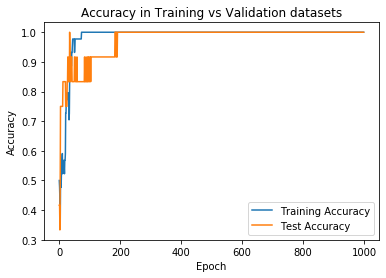

In [0]:
#Diagnostic Plot IIa: Model Performance (training accuracy vs test accuracy) for 1000 epochs
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

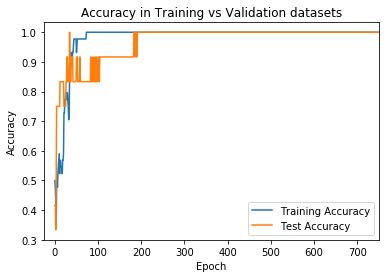

In [0]:
#Diagnostic Plot IIb: Model Performance (training accuracy vs test accuracy) for 750 epochs
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 750)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

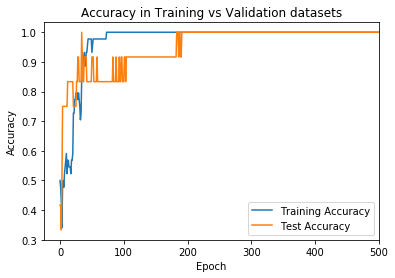

In [0]:
#Diagnostic Plot IIc: Model Performance (training accuracy vs test accuracy) for 500 epochs
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 500)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()

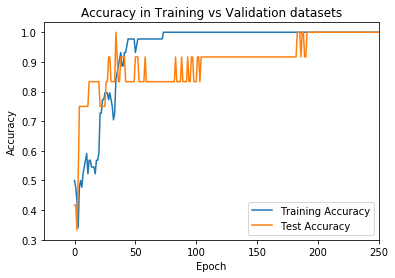

In [0]:
#Diagnostic Plot IIc: Model Performance (training accuracy vs test accuracy) for 250 epochs
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Accuracy in Training vs Validation datasets')
pyplot.xlim(-25, 250)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')
pyplot.show()